In [1]:
import numpy as np
import ConformaQuantile as CQ
import importlib
import kappa as kp
import matplotlib.pyplot as plt
from scipy.stats import norm
importlib.reload(CQ)
importlib.reload(kp)

<module 'kappa' from '/Users/wangyanbo/conformal/kappa.py'>

In [2]:
quantile = 0.6
n_samples = 3000
n_X1 = 3
n_X2 = 1
n_X3 = 1
np.random.seed(0)

X1 = abs(np.random.normal(6.4, 10, (n_samples, n_X1)))
X2 = abs(np.random.normal(0.4, 1, (n_samples, n_X2)))
X3 = abs(np.random.normal(0.9, 1, (n_samples, n_X3)))

coefficients = abs(np.random.normal(1, 4, n_X1 + n_X2))
X = np.hstack((X1, X2, X3))
noise = np.random.normal(0, 1, n_samples)

X_true = X[:, :(n_X1 + n_X2)]
# here we don't include the unobserved variables
X_observed = np.hstack((X1, X2))
Y = np.dot(X_true, coefficients)


train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

In [ ]:
loss = {}
models = ['linear', 'quantile', 'lasso', 'ridge', 'random_forest', 'glm', 'neural_network', 'ko', 'quantile_net']

Y0 = np.random.exponential(30/Y)



for model in models:
    loss_unadjusted, loss_adjusted = CQ.perform_regression_analysis(X_observed, Y0, train_ratio, test_ratio, validation_ratio, quantile, model_type=model)
    # 将结果存储在字典中
    loss[model] = {'loss_unadjusted': loss_unadjusted, 'loss_adjusted': loss_adjusted}

min_loss_model = min(loss, key=lambda x: loss[x]['loss_adjusted'])
max_loss_model = max(loss, key=lambda x: loss[x]['loss_adjusted'])

print(f"\n拥有最小调整损失的模型：{min_loss_model}")
print(f"\n拥有最大调整损失的模型：{max_loss_model}")


linear loss unadjusted 2.207646718028432 loss_adjusted 1.729039673258759
quantile loss unadjusted 2.1484732026808935 loss_adjusted 1.7286183283230991
lasso loss unadjusted 2.20343344508542 loss_adjusted 1.729690895861755
ridge loss unadjusted 2.2076393008213517 loss_adjusted 1.7290378195894445
random_forest loss unadjusted 2.307116718977346 loss_adjusted 1.8107191326950949
glm loss unadjusted 2.207646718028432 loss_adjusted 1.7290396732587594
neural_network loss unadjusted 2.1796505188953827 loss_adjusted 1.7343047113244825
ko loss unadjusted 2.3990820750517625 loss_adjusted 2.082879084477799
quantile_net loss unadjusted 2.163070844223945 loss_adjusted 1.7273784821728706

拥有最小调整损失的模型：quantile_net

拥有最大调整损失的模型：ko


linear loss unadjusted 0.056404570903265026 loss_adjusted 0.052367180606489774
quantile loss unadjusted 0.055910482630487236 loss_adjusted 0.05230437812264239
lasso loss unadjusted 0.054334991055889806 loss_adjusted 0.053790980957223115
ridge loss unadjusted 0.05640452935957232 loss_adjusted 0.052367165980555644
random_forest loss unadjusted 0.05729173667674176 loss_adjusted 0.05422158754640133
glm loss unadjusted 0.05640457090326504 loss_adjusted 0.05236718060648978
neural_network loss unadjusted 0.08170709772700008 loss_adjusted 0.0765308408918337
ko loss unadjusted 0.07378852524151813 loss_adjusted 0.0711247774845504
quantile_net loss unadjusted 0.05632737971025092 loss_adjusted 0.05283781231275536

拥有最小调整损失的模型：quantile

拥有最大调整损失的模型：neural_network


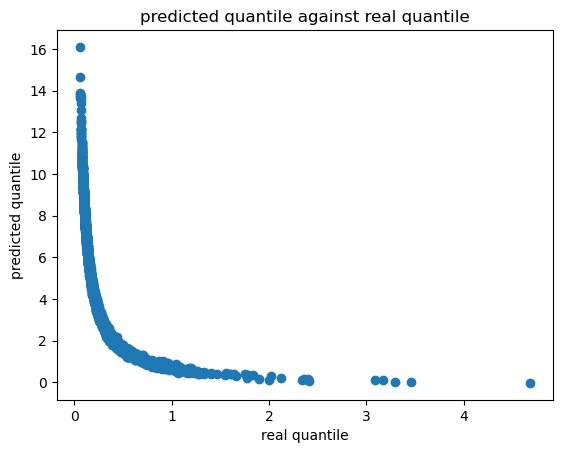

In [4]:
quantile_real = -30 * np.log(1-quantile) / Y

kappa, d, bias, quantile_pred = kp.calculate_kappa_in(X_observed, Y0, quantile, 'quantile', quantile_real)
plt.scatter(quantile_real, quantile_pred)
plt.xlabel('real quantile')
plt.ylabel('predicted quantile')
plt.title('predicted quantile against real quantile')
plt.show()

In [5]:
def quantile_loss(y_true, y_pred, quantile):
    error = y_true - y_pred
    return np.maximum(quantile * error, (quantile - 1) * error).mean()
theoretical_average_cost = quantile_loss(Y0, quantile_real, quantile)
print(f"\n理论平均成本：{theoretical_average_cost}")


理论平均成本：2.719107891123061


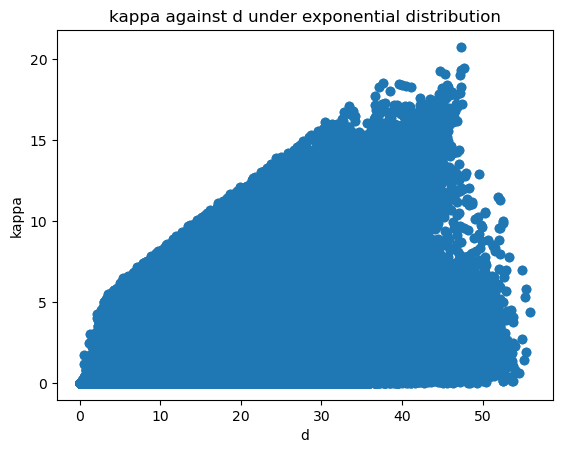

In [6]:
plt.scatter(d, kappa)
plt.xlabel('d')
plt.ylabel('kappa')
plt.title('kappa against d under exponential distribution')
plt.show()


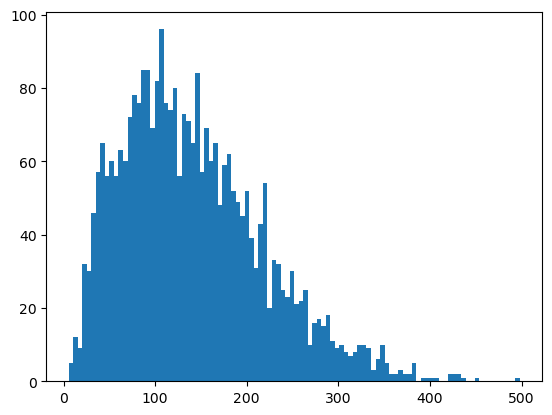

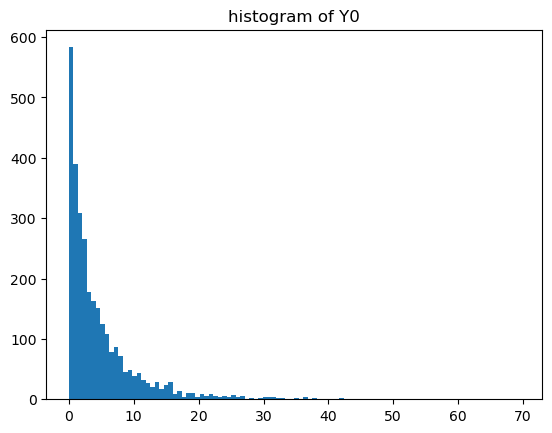

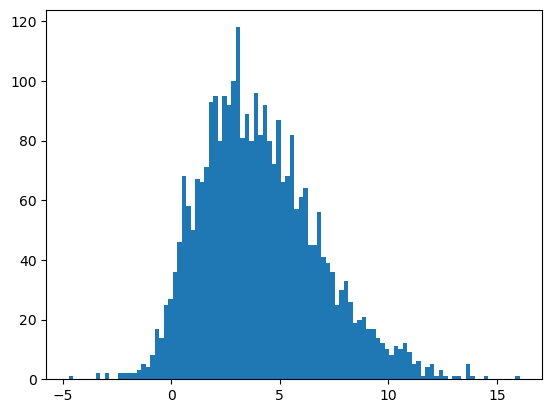

In [7]:
plt.hist(Y, bins=100)
plt.show()


plt.hist(Y0, bins=100)
plt.title('histogram of Y0')
plt.show()

plt.hist(bias, bins = 100)
plt.show()


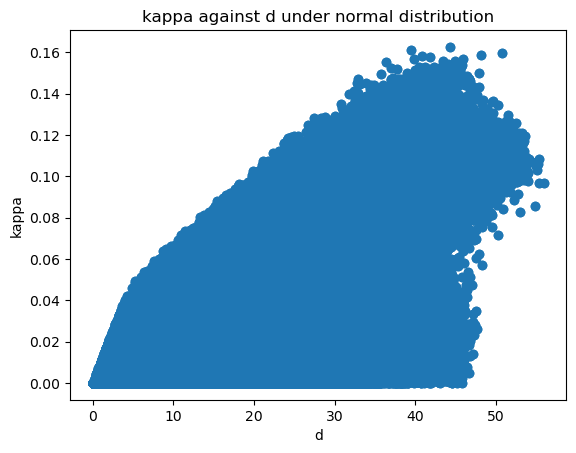

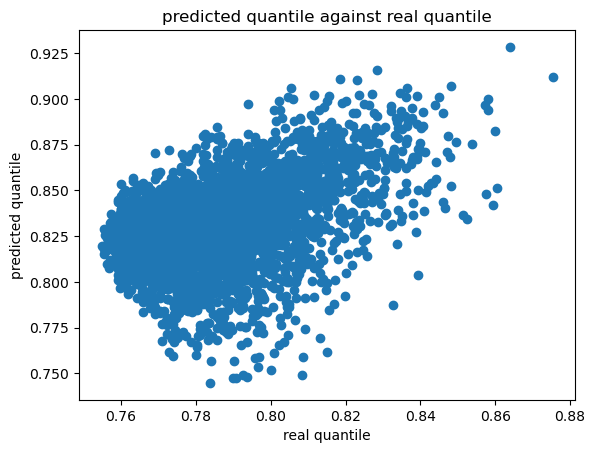

In [8]:
Y1 = 1 / ( 1 + np.exp(-Y/1000))  + noise
quantile_value = norm.ppf(quantile)
quantile_real_1 = 1 / ( 1 + np.exp(-Y/1000)) + quantile_value
kappa, d, bias, quantile_pred = kp.calculate_kappa_in(X_observed, Y1, quantile, 'quantile', quantile_real_1)

plt.scatter(d, kappa)
plt.xlabel('d')
plt.ylabel('kappa')
plt.title('kappa against d under normal distribution')
plt.show()

plt.scatter(quantile_real_1, quantile_pred)
plt.xlabel('real quantile')
plt.ylabel('predicted quantile')
plt.title('predicted quantile against real quantile')
plt.show()



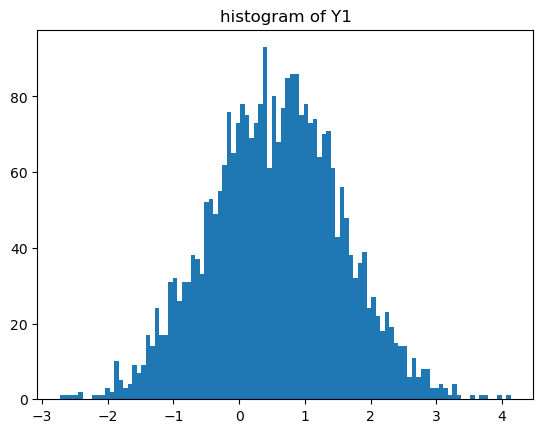

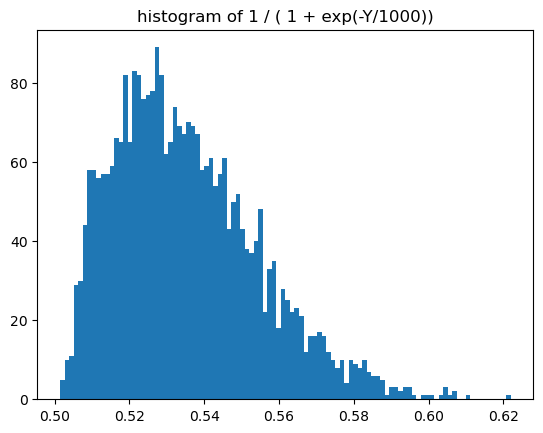

In [9]:
plt.hist(Y1, bins=100)
plt.title('histogram of Y1')
plt.show()

plt.hist(1 / ( 1 + np.exp(-Y/1000)), bins=100)
plt.title('histogram of 1 / ( 1 + exp(-Y/1000))')
plt.show()

In [10]:
theoretical_average_cost_normal = quantile_loss(Y1, quantile_real_1, quantile)
print(f"\n理论平均成本：{theoretical_average_cost_normal}")


理论平均成本：0.38457425556916225


In [11]:
loss = {}
models = ['linear', 'quantile', 'lasso', 'ridge', 'random_forest', 'glm', 'neural_network', 'ko', 'quantile_net']


for model in models:
    loss_unadjusted, loss_adjusted = CQ.perform_regression_analysis(X_observed, Y1, train_ratio, test_ratio, validation_ratio, quantile, model_type=model)
    # 将结果存储在字典中
    loss[model] = {'loss_unadjusted': loss_unadjusted, 'loss_adjusted': loss_adjusted}

min_loss_model = min(loss, key=lambda x: loss[x]['loss_adjusted'])
max_loss_model = max(loss, key=lambda x: loss[x]['loss_adjusted'])

print(f"\n拥有最小调整损失的模型：{min_loss_model}")
print(f"\n拥有最大调整损失的模型：{max_loss_model}")

linear loss unadjusted 0.38373596549 loss_adjusted 0.3725797912364596
quantile loss unadjusted 0.36918562407004524 loss_adjusted 0.372802281479723
lasso loss unadjusted 0.38512564505615227 loss_adjusted 0.3720292869970448
ridge loss unadjusted 0.3837368680713529 loss_adjusted 0.3725798404623808
random_forest loss unadjusted 0.40016806019458734 loss_adjusted 0.38755276502877434
glm loss unadjusted 0.38373596548999994 loss_adjusted 0.3725797912364596
neural_network loss unadjusted 0.38331047747135993 loss_adjusted 0.37812163707169494
ko loss unadjusted 0.43543401333365184 loss_adjusted 0.4315648971105286
quantile_net loss unadjusted 0.3774820140212069 loss_adjusted 0.3831190719098107

拥有最小调整损失的模型：lasso

拥有最大调整损失的模型：ko


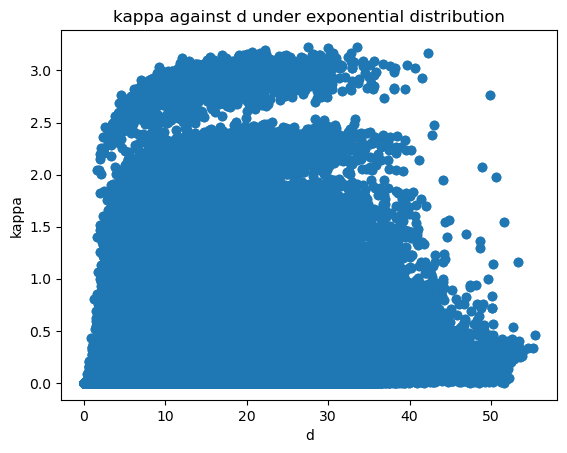

In [12]:
# 训练集测试集分开，结果仍然是几乎线性的
kappa_1, d_1, bias_1 = kp.calculate_kappa_ext(X_observed, Y1, quantile, 0.5, 'quantile', quantile_real)
plt.scatter(d_1, kappa_1)
plt.xlabel('d')
plt.ylabel('kappa')
plt.title('kappa against d under exponential distribution')
plt.show()

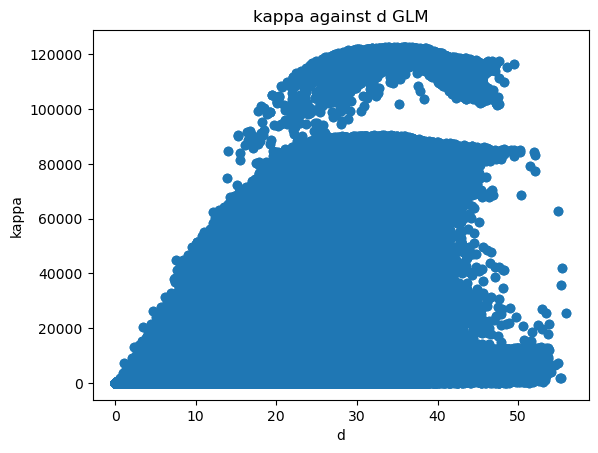

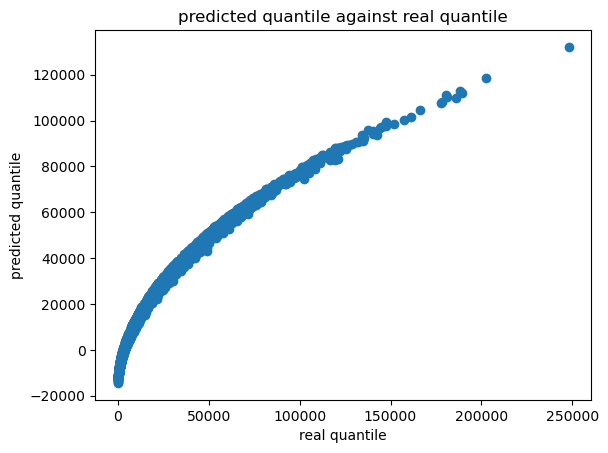

In [13]:
Y2 = Y**2 + noise
quantile_real_2 = Y**2 + quantile_value
kappa_2, d_2, bias_2, quantile_pred_2 = kp.calculate_kappa_in(X_observed, Y2, quantile, 'quantile', quantile_real_2)
plt.scatter(d_2, kappa_2)
plt.xlabel('d')
plt.ylabel('kappa')
plt.title('kappa against d GLM')
plt.show()

plt.scatter(quantile_real_2, quantile_pred_2)
plt.xlabel('real quantile')
plt.ylabel('predicted quantile')
plt.title('predicted quantile against real quantile')
plt.show()


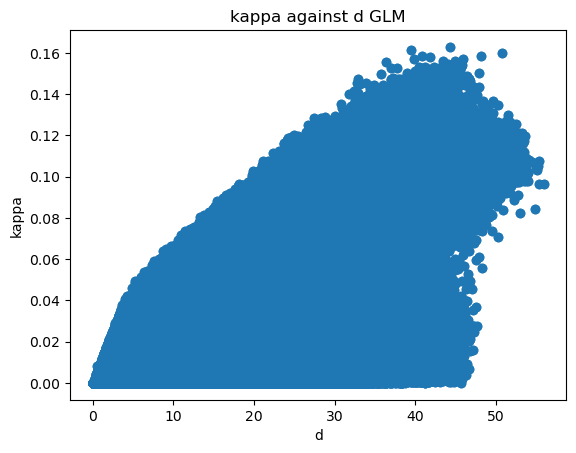

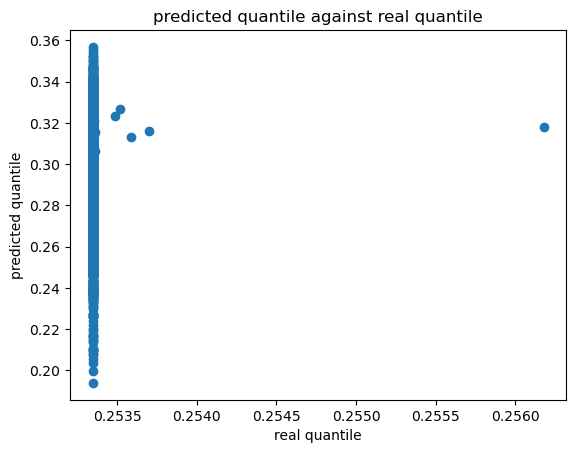

In [14]:
Y3 =  np.exp(-Y) + noise
quantile_real_3 = np.exp(-Y) + quantile_value
kappa_3, d_3, bias_3, quantile_pred_3 = kp.calculate_kappa_in(X_observed, Y3, quantile, 'quantile', quantile_real_3)
plt.scatter(d_3, kappa_3)
plt.xlabel('d')
plt.ylabel('kappa')
plt.title('kappa against d GLM')
plt.show()

plt.scatter(quantile_real_3, quantile_pred_3)
plt.xlabel('real quantile')
plt.ylabel('predicted quantile')
plt.title('predicted quantile against real quantile')
plt.show()

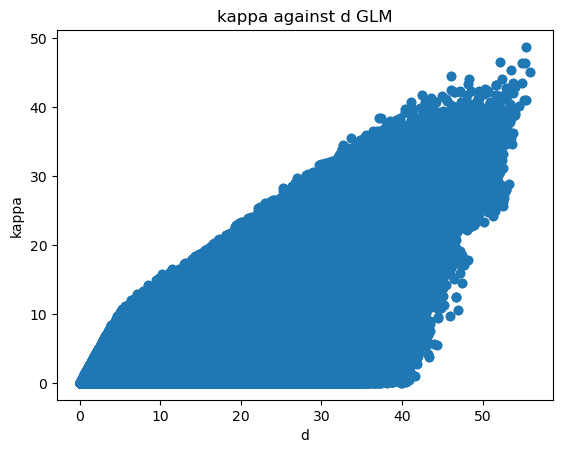

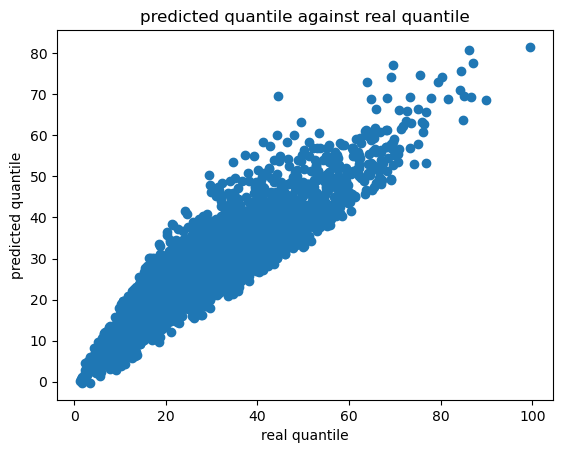

In [15]:
# Uniform distribution
Y4 = np.random.uniform(-Y, Y)
quantile_real_4 = -(1-2*quantile)*(np.abs(Y))
kappa_4, d_4, bias_4, quantile_pred_4 = kp.calculate_kappa_in(X_observed, Y4
                                                              , quantile, 'quantile', quantile_real_4)
plt.scatter(d_4, kappa_4)
plt.xlabel('d')
plt.ylabel('kappa')
plt.title('kappa against d GLM')
plt.show()

plt.scatter(quantile_real_4, quantile_pred_4)
plt.xlabel('real quantile')
plt.ylabel('predicted quantile')
plt.title('predicted quantile against real quantile')
plt.show()

In [41]:
loss= {}
models = ['linear', 'quantile', 'lasso', 'ridge', 'random_forest', 'glm', 'neural_network', 'ko', 'quantile_net']


for model in models:
    loss_unadjusted, loss_adjusted = CQ.perform_regression_analysis(X_observed, Y4, 
                                                                    train_ratio, test_ratio, 
                                                                    validation_ratio, quantile,
                                                                      model_type=model)
    # 将结果存储在字典中
    loss[model] = {'loss_unadjusted': loss_unadjusted, 'loss_adjusted': loss_adjusted}

min_loss_model = min(loss, key=lambda x: loss[x]['loss_adjusted'])
max_loss_model = max(loss, key=lambda x: loss[x]['loss_adjusted'])

print(f"\n拥有最小调整损失的模型：{min_loss_model}")
print(f"\n拥有最大调整损失的模型：{max_loss_model}")

linear loss unadjusted 58.734234301215345 loss_adjusted 57.61093222098194
quantile loss unadjusted 58.00614808989668 loss_adjusted 57.47599720238286
lasso loss unadjusted 58.72871797206125 loss_adjusted 57.60761758613627
ridge loss unadjusted 58.7342162980826 loss_adjusted 57.6109255831154
random_forest loss unadjusted 59.101325856216484 loss_adjusted 58.883657726392954
glm loss unadjusted 58.734234301215345 loss_adjusted 57.61093222098194
neural_network loss unadjusted 58.93973459856899 loss_adjusted 57.706139833435266
ko loss unadjusted 80.05418202386059 loss_adjusted 82.05356745439735
quantile_net loss unadjusted 58.625240377149005 loss_adjusted 58.00951068092243

拥有最小调整损失的模型：quantile

拥有最大调整损失的模型：ko


In [17]:
theoretical_average_cost_uniform = quantile_loss(Y4, quantile_real_4, quantile)
print(f"\n理论平均成本：{theoretical_average_cost_uniform}")


理论平均成本：33.2464844616382


In [25]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

threshold = 40
first_element = X_observed[0]
pooled_x = []
pooled_y = []
# distance = []

# for x, y in zip(X_observed, Y4):
#     distance.append(euclidean_distance(x, first_element))

# plt.hist(distance, bins=100)
# plt.show()
for x, y in zip(X_observed, Y4):
    if euclidean_distance(x, first_element) <= threshold:
        pooled_x.append(x)
        pooled_y.append(y)
pooled_x = np.array(pooled_x)
pooled_y = np.array(pooled_y)
loss = {}
for model in models:
    loss_unadjusted, loss_adjusted = CQ.perform_regression_analysis(pooled_x, pooled_y, 
                                                                    train_ratio, test_ratio, 
                                                                    validation_ratio, quantile,
                                                                      model_type=model)
    # 将结果存储在字典中
    loss[model] = {'loss_unadjusted': loss_unadjusted, 'loss_adjusted': loss_adjusted}

min_loss_model = min(loss, key=lambda x: loss[x]['loss_adjusted'])
max_loss_model = max(loss, key=lambda x: loss[x]['loss_adjusted'])

print(f"\n拥有最小调整损失的模型：{min_loss_model}")
print(f"\n拥有最大调整损失的模型：{max_loss_model}")

linear loss unadjusted 34.581235543266004 loss_adjusted 33.99737256751807
quantile loss unadjusted 34.03563542511795 loss_adjusted 33.63410490100531
lasso loss unadjusted 34.57913692358073 loss_adjusted 34.00186669677294
ridge loss unadjusted 34.58122682915156 loss_adjusted 33.997395730456226
random_forest loss unadjusted 36.44452841863244 loss_adjusted 34.57555965437908
glm loss unadjusted 34.581235543266004 loss_adjusted 33.99737256751807
neural_network loss unadjusted 34.66975140087532 loss_adjusted 33.88142156988957
ko loss unadjusted 43.869018953736365 loss_adjusted 40.187700697553254
quantile_net loss unadjusted 34.27364753426974 loss_adjusted 33.43212068549035

拥有最小调整损失的模型：quantile_net

拥有最大调整损失的模型：ko


In [45]:
quantile = 0.6
n_samples = 5000
n_X1 = 9
n_X2 = 1
n_X3 = 1
np.random.seed(0)

X1 = abs(np.random.normal(6.4, 10, (n_samples, n_X1)))
X2 = abs(np.random.normal(0.4, 1, (n_samples, n_X2)))
X3 = abs(np.random.normal(0.9, 1, (n_samples, n_X3)))

coefficients = abs(np.random.normal(1, 4, n_X1 + n_X2))
X = np.hstack((X1, X2, X3))
noise = np.random.normal(0, 1, n_samples)

X_true = X[:, :(n_X1 + n_X2)]

X_observed = np.hstack((X1, X3))
Y = np.dot(X_true, coefficients)

threshold = 50
first_element = X_observed[0]
Y5 = np.random.uniform(-Y, Y)

pooled_x4 = []
pooled_y4 = []
# distance = []

# for x, y in zip(X_observed, Y5):
#     distance.append(euclidean_distance(x, first_element))

# plt.hist(distance, bins=100)
# plt.show()
for x, y in zip(X_observed, Y5):
    if euclidean_distance(x, first_element) <= threshold:
        pooled_x4.append(x)
        pooled_y4.append(y)
pooled_x4 = np.array(pooled_x4)
pooled_y4 = np.array(pooled_y4)

models = ['linear', 'quantile', 'lasso', 'ridge', 'random_forest', 'glm', 'neural_network', 'ko', 'quantile_net']
loss = {}
for model in models:
    loss_unadjusted, loss_adjusted = CQ.perform_regression_analysis(pooled_x4, pooled_y4, 
                                                                    train_ratio, test_ratio, 
                                                                    validation_ratio, quantile,
                                                                      model_type=model)
    # 将结果存储在字典中
    loss[model] = {'loss_unadjusted': loss_unadjusted, 'loss_adjusted': loss_adjusted}

min_loss_model = min(loss, key=lambda x: loss[x]['loss_adjusted'])
max_loss_model = max(loss, key=lambda x: loss[x]['loss_adjusted'])

print(f"\n拥有最小调整损失的模型：{min_loss_model}")
print(f"\n拥有最大调整损失的模型：{max_loss_model}")

linear loss unadjusted 59.97718252022704 loss_adjusted 56.852548462611885
quantile loss unadjusted 56.83207453054662 loss_adjusted 56.887241384582005
lasso loss unadjusted 59.97854935674362 loss_adjusted 56.85429097873392
ridge loss unadjusted 59.9771939397755 loss_adjusted 56.85257044162551
random_forest loss unadjusted 60.57362238869085 loss_adjusted 57.46263933666094
glm loss unadjusted 59.97718252022704 loss_adjusted 56.852548462611885
neural_network loss unadjusted 60.042988892335444 loss_adjusted 56.86651121765175
ko loss unadjusted 78.3882000899813 loss_adjusted 76.38352798856096
quantile_net loss unadjusted 57.02152035398395 loss_adjusted 57.35114839197824

拥有最小调整损失的模型：linear

拥有最大调整损失的模型：ko


In [31]:
loss_5 = {}
models = ['linear', 'quantile', 'lasso', 'ridge', 'random_forest', 'glm', 'neural_network', 'ko', 'quantile_net']


for model in models:
    loss_unadjusted, loss_adjusted = CQ.perform_regression_analysis(X_observed, Y5, 
                                                                    train_ratio, test_ratio, 
                                                                    validation_ratio, quantile,
                                                                      model_type=model)
    # 将结果存储在字典中
    loss[model] = {'loss_unadjusted': loss_unadjusted, 'loss_adjusted': loss_adjusted}

min_loss_model = min(loss, key=lambda x: loss[x]['loss_adjusted'])
max_loss_model = max(loss, key=lambda x: loss[x]['loss_adjusted'])

print(f"\n拥有最小调整损失的模型：{min_loss_model}")
print(f"\n拥有最大调整损失的模型：{max_loss_model}")

linear loss unadjusted 58.734234301215345 loss_adjusted 57.61093222098194
quantile loss unadjusted 58.00614808989668 loss_adjusted 57.47599720238286
lasso loss unadjusted 58.72871797206125 loss_adjusted 57.60761758613627
ridge loss unadjusted 58.7342162980826 loss_adjusted 57.6109255831154
random_forest loss unadjusted 59.101325856216484 loss_adjusted 58.883657726392954
glm loss unadjusted 58.734234301215345 loss_adjusted 57.61093222098194
neural_network loss unadjusted 59.02134601790838 loss_adjusted 57.964017511234985
ko loss unadjusted 80.05418202386059 loss_adjusted 82.05356745439735
quantile_net loss unadjusted 58.73510573783296 loss_adjusted 58.10080995720142

拥有最小调整损失的模型：quantile

拥有最大调整损失的模型：ko
